In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from scipy.stats import pearsonr

In [14]:
students = pd.read_csv(r'C:\Users\\ASUS\Downloads\SPF_Student.csv', sep=';')
academic_factors = pd.read_csv(r'C:\Users\\ASUS\Downloads\SPF_AFactors.csv', sep=";")
family_factors = pd.read_csv(r'C:\Users\\ASUS\Downloads\SPF_Family.csv', sep=";")
school_factors = pd.read_csv(r'C:\Users\\ASUS\Downloads\SPF_School.csv', sep=";")

print("Columns in academic_factors:", academic_factors.columns)
print("Columns in family_factors:", family_factors.columns)
print("Columns in students:", students.columns)
print("Columns in school_factors:", school_factors.columns)

Columns in academic_factors: Index(['AF_ID', 'Student_ID', 'Hours_Studied', 'Access_to_Resources',
       'Extracurricular_Activities', 'Internet_Access', 'Peer_Influence'],
      dtype='object')
Columns in family_factors: Index(['Family_ID', 'Student_ID', 'Parental_Involvement', 'Family_Income',
       'Parental_Education_Level'],
      dtype='object')
Columns in students: Index(['Student_ID', 'Sleep_Hours', 'Motivation_Level', 'Physical_Activity',
       'Learning_Disabilities', 'Gender'],
      dtype='object')
Columns in school_factors: Index(['School_ID', 'Student_ID', 'Attendance', 'Tutoring_Sessions',
       'Teacher_Quality', 'School_Type', 'Distance_from_Home',
       'Previous_Scores', 'Exam_Score'],
      dtype='object')


Correlations with Exam_Score (sorted descending):
Exam_Score                    1.000000
Attendance                    0.581072
Hours_Studied                 0.445455
Previous_Scores               0.175079
Access_to_Resources           0.169770
Parental_Involvement          0.157114
Tutoring_Sessions             0.156525
Parental_Education_Level      0.104322
Peer_Influence                0.100217
Family_Income                 0.094555
Motivation_Level              0.086937
Teacher_Quality               0.076387
Extracurricular_Activities    0.064382
Internet_Access               0.051475
Physical_Activity             0.027824
School_Type                   0.008844
Gender                        0.002032
Sleep_Hours                  -0.017022
Learning_Disabilities        -0.085066
Distance_from_Home           -0.091110
Name: Exam_Score, dtype: float64


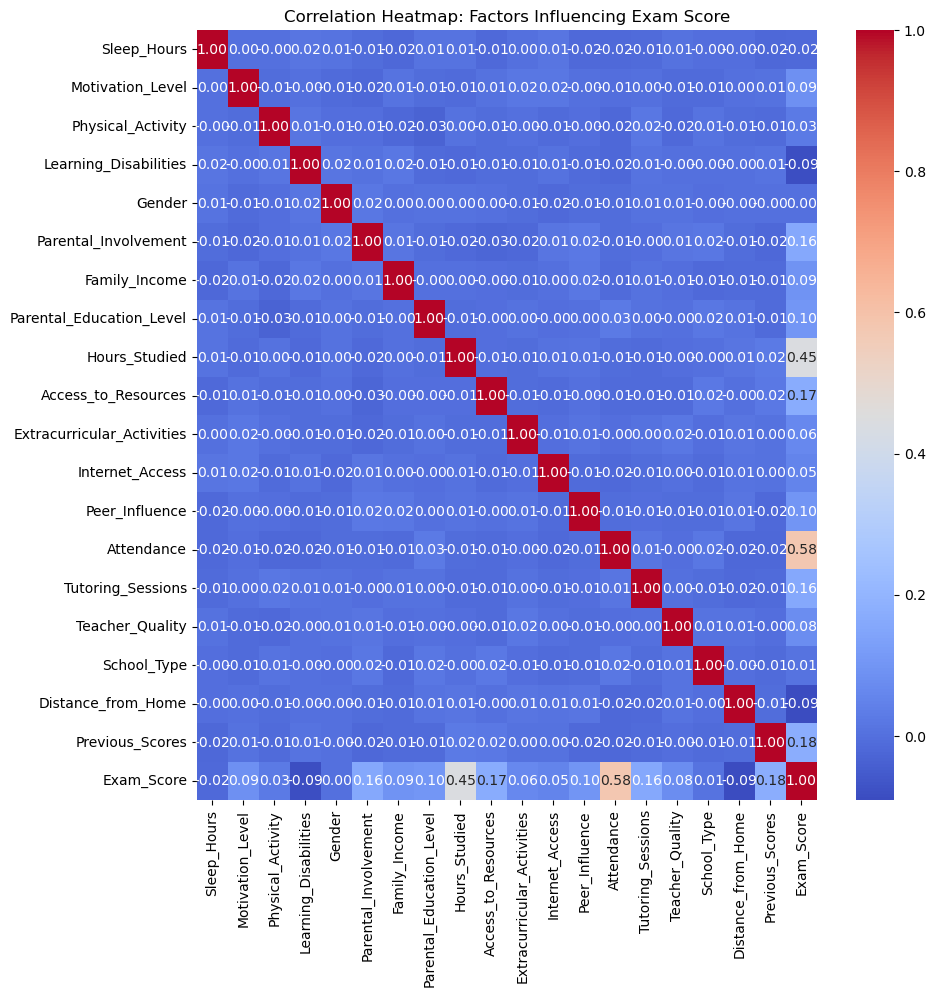

In [31]:
data = pd.merge(students, family_factors, on="Student_ID", how="inner")
data = pd.merge(data, academic_factors, on="Student_ID", how="inner")
data = pd.merge(data, school_factors, on="Student_ID", how="inner")
data = data.replace([np.inf, -np.inf, np.nan], 0)

mappings = {
    'Family_Income': {'Low': 1, 'Medium': 2, 'High': 3},
    'Parental_Education_Level': {'High School': 1, 'College': 2, 'Postgraduate': 3},
    'Motivation_Level': {'Low': 1, 'Medium': 2, 'High': 3},
    'Peer_Influence': {'Positive': 1, 'Negative': -1, 'Neutral': 0},
    'Teacher_Quality': {'Low': 1, 'Medium': 2, 'High': 3},
    'Gender': {'Male': 0, 'Female': 1},
    'Distance_from_Home': {'Near': 1, 'Moderate': 2, 'Far': 3},
    'School_Type': {'Public': 0, 'Private': 1},
    'Extracurricular_Activities': {'Yes': 1, 'No': 0},
    'Internet_Access': {'Yes': 1, 'No': 0},
    'Access_to_Resources': {'Low': 1, 'Medium': 2, 'High': 3},
    'Learning_Disabilities': {'Yes': 1, 'No': 0},
    'Parental_Involvement': {'Low': 1, 'Medium': 2, 'High': 3}
}

for column, mapping in mappings.items():
    if column in data.columns:
        data[column] = data[column].map(mapping)

columns_to_drop = ['School_ID', 'Family_ID', 'AF_ID', 'Student_ID']
data = data.drop(columns=columns_to_drop, errors='ignore')

output_path = r'C:\Users\\ASUS\Downloads\Students_Data.csv'
data.to_csv(output_path, index=False)

correlation = data.corr()
sorted_correlation = correlation["Exam_Score"].sort_values(ascending=False)
print("Correlations with Exam_Score (sorted descending):")
print(sorted_correlation)

plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Factors Influencing Exam Score")
plt.show()

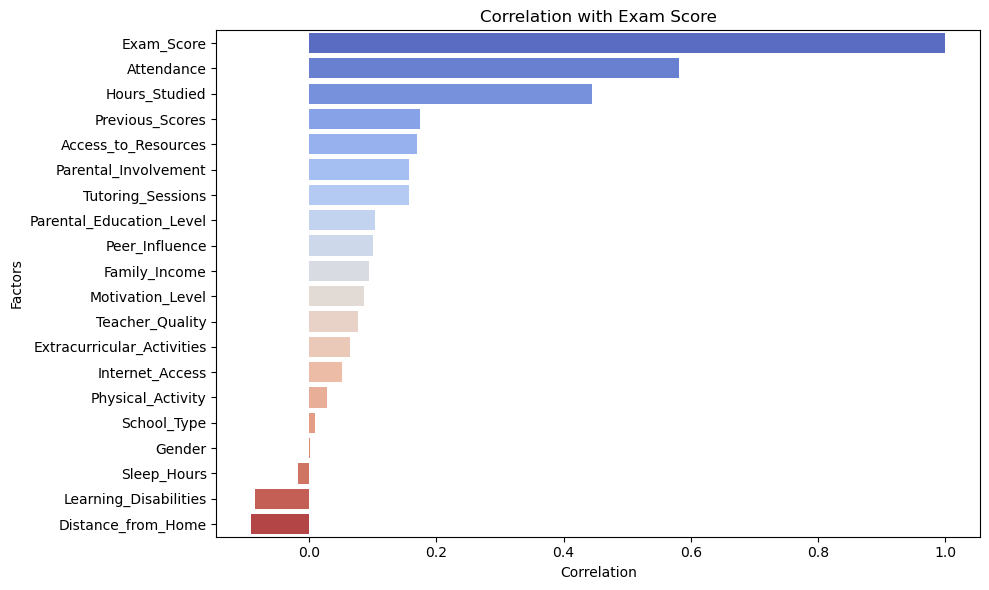

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=sorted_correlation.values,
    y=sorted_correlation.index,
    palette="coolwarm",
    errorbar=None,
    hue=sorted_correlation.index,
    dodge=False
)

plt.title("Correlation with Exam Score")
plt.xlabel("Correlation")
plt.ylabel("Factors")
plt.tight_layout()
plt.show()

In [41]:
Students_Data = pd.read_csv(r'C:\Users\\ASUS\Downloads\Students_Data.csv', sep=',')
Students_Data = Students_Data.replace([np.inf, -np.inf], np.nan).dropna()

def calculate_correlation_with_pvalues(df, target_column):
    correlations = {}
    p_values = {}
    
    for column in df.columns:
        if column != target_column and pd.api.types.is_numeric_dtype(df[column]):
            corr, p_value = pearsonr(df[target_column], df[column])
            correlations[column] = corr
            p_values[column] = p_value
    
    return pd.DataFrame({
        'Correlation': correlations,
        'P-value': p_values
    })

target_column = 'Exam_Score'

if target_column in Students_Data.columns:
    correlation_table = calculate_correlation_with_pvalues(Students_Data, target_column)
    correlation_table_sorted = correlation_table.sort_values(by='Correlation', ascending=False)
    print("Correlation and P-value Table:")
    print(correlation_table_sorted)

Correlation and P-value Table:
                            Correlation        P-value
Attendance                     0.580259   0.000000e+00
Hours_Studied                  0.445104  4.524802e-308
Previous_Scores                0.174283   1.121433e-44
Access_to_Resources            0.167856   1.593091e-41
Tutoring_Sessions              0.156829   2.102216e-36
Parental_Involvement           0.156014   4.860687e-36
Parental_Education_Level       0.105253   3.530221e-17
Peer_Influence                 0.099133   2.105122e-15
Family_Income                  0.094555   3.822948e-14
Motivation_Level               0.088502   1.436604e-12
Teacher_Quality                0.075107   1.907286e-09
Extracurricular_Activities     0.063063   4.646554e-07
Internet_Access                0.051124   4.412828e-05
Physical_Activity              0.025148   4.461342e-02
School_Type                    0.010868   3.854988e-01
Gender                         0.004932   6.936955e-01
Sleep_Hours                   -0.0

In [43]:
file_path = r'C:\Users\ASUS\Downloads\Students_Data.csv'
data_encoded = pd.read_csv(file_path)
data_encoded = data_encoded.replace([np.inf, -np.inf, np.nan], 0)

target_column = 'Exam_Score'
X = data_encoded.drop(columns=[target_column])
y = data_encoded[target_column]

X_with_const = sm.add_constant(X)

model = sm.OLS(y, X_with_const).fit()

print(model.summary())

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.params[1:]
})

print("\nCoefficients for each feature:")
print(coefficients)

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     917.0
Date:                Tue, 07 Jan 2025   Prob (F-statistic):               0.00
Time:                        21:23:34   Log-Likelihood:                -14078.
No. Observations:                6607   AIC:                         2.820e+04
Df Residuals:                    6587   BIC:                         2.833e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [74]:
relevant_features = ['Sleep_Hours', 'Motivation_Level', 'Physical_Activity', 'Learning_Disabilities',
                     'Parental_Involvement', 'Family_Income', 'Parental_Education_Level', 'Hours_Studied', 
                     'Access_to_Resources', 'Extracurricular_Activities', 'Internet_Access', 'Peer_Influence',
                     'Attendance', 'Tutoring_Sessions', 'Teacher_Quality', 'School_Type', 'Distance_from_Home', 'Previous_Scores']

relevant_stats = model.summary2().tables[1].loc[relevant_features, ['Coef.', 'P>|t|']]

relevant_stats.columns = ['Coefficient', 'P-value']

print("\nRegression quantification for the most relevant features:")
print(relevant_stats)

print("\nRegression Quantifications:")
for feature, row in relevant_stats.iterrows():
    coefficient = row['Coefficient']
    if coefficient > 0:
        print(f"An increase of 1 unit in '{feature}' increases 'Exam_Score' by {coefficient:.3f} points on average.")
    else:
        print(f"A decrease of 1 unit in '{feature}' decreases 'Exam_Score' by {abs(coefficient):.3f} points on average.")


Regression quantification for the most relevant features:
                            Coefficient        P-value
Sleep_Hours                   -0.001382   9.356739e-01
Motivation_Level               0.526079   2.548678e-47
Physical_Activity              0.185919   2.797380e-14
Learning_Disabilities         -0.855703   2.443466e-25
Parental_Involvement           0.995286  7.776221e-158
Family_Income                  0.530275   2.539034e-54
Parental_Education_Level       0.465507   8.585371e-49
Hours_Studied                  0.294949   0.000000e+00
Access_to_Resources            1.026133  1.440324e-168
Extracurricular_Activities     0.551806   7.550348e-27
Internet_Access                0.929018   2.213482e-22
Peer_Influence                 0.514164   5.394357e-53
Attendance                     0.198875   0.000000e+00
Tutoring_Sessions              0.497284  1.771492e-125
Teacher_Quality                0.467627   1.464030e-32
School_Type                   -0.035722   5.133669e-01
Distan

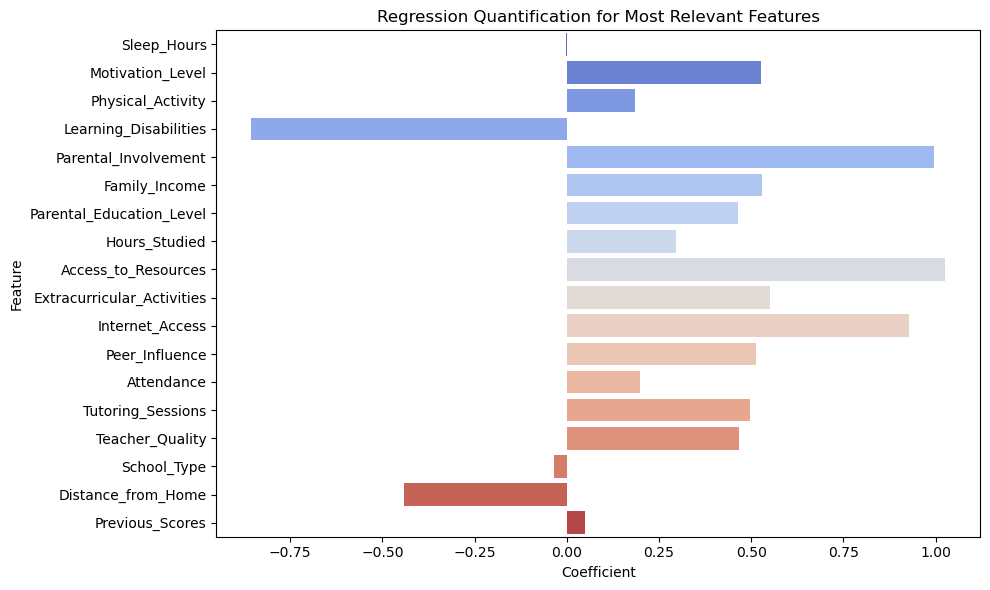

In [47]:
data = {
    'Feature': [
        'Sleep_Hours', 'Motivation_Level', 'Physical_Activity', 'Learning_Disabilities', 
        'Parental_Involvement', 'Family_Income', 'Parental_Education_Level', 'Hours_Studied', 
        'Access_to_Resources', 'Extracurricular_Activities', 'Internet_Access', 'Peer_Influence',
        'Attendance', 'Tutoring_Sessions', 'Teacher_Quality', 'School_Type', 'Distance_from_Home', 'Previous_Scores'
    ],
    'Coefficient': [
        -0.001382, 0.526079, 0.185919, -0.855703, 0.995286, 0.530275, 0.465507, 0.294949, 
        1.026133, 0.551806, 0.929018, 0.514164, 0.198875, 0.497284, 0.467627, -0.035722, -0.441050, 0.048909
    ]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=df,
    palette="coolwarm",
    orient='h',
    hue='Feature',
    dodge=False,
    errorbar=None
)

plt.title('Regression Quantification for Most Relevant Features')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

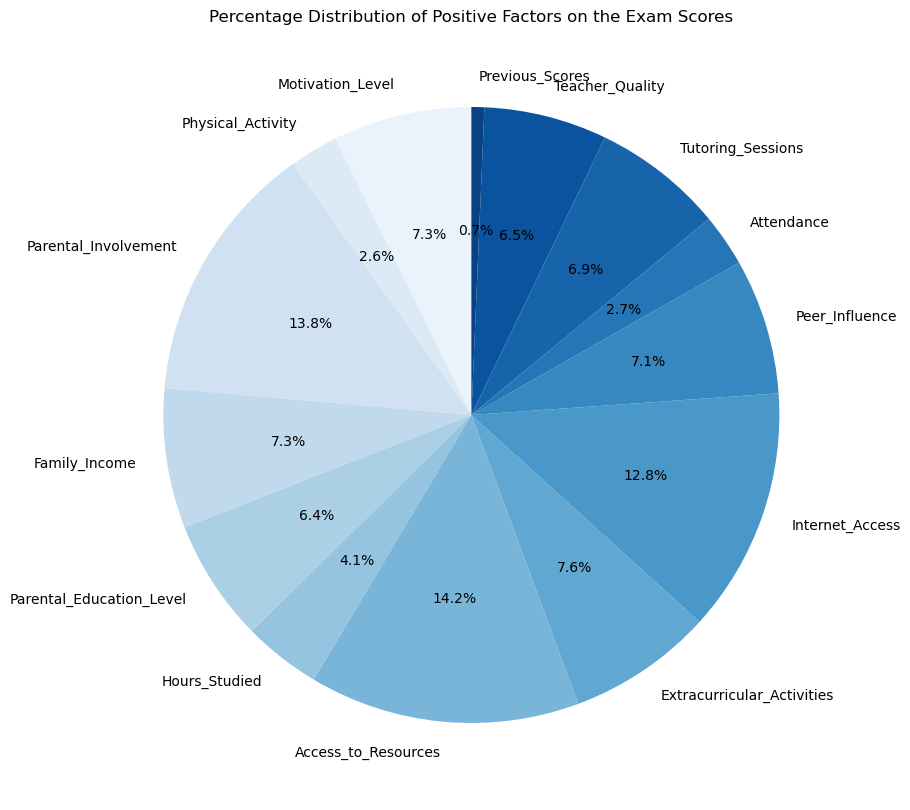

In [49]:
positive_factors = {
    'Feature': ['Motivation_Level', 'Physical_Activity', 'Parental_Involvement', 'Family_Income', 'Parental_Education_Level', 'Hours_Studied', 
        'Access_to_Resources', 'Extracurricular_Activities', 'Internet_Access', 'Peer_Influence',
        'Attendance', 'Tutoring_Sessions', 'Teacher_Quality', 'Previous_Scores'
    ],
    'Coefficient': [
       0.526079, 0.185919, 0.995286, 0.530275, 0.465507, 0.294949, 1.026133, 0.551806, 0.929018, 0.514164, 0.198875, 0.497284, 0.467627, 0.048909
    ]
}

total_positive = sum(positive_factors['Coefficient'])
percentages = [coef / total_positive * 100 for coef in positive_factors['Coefficient']]

plt.figure(figsize=(10, 10))
plt.pie(percentages, labels=positive_factors['Feature'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Blues", len(positive_factors['Feature'])))
plt.title('Percentage Distribution of Positive Factors on the Exam Scores')
plt.show()

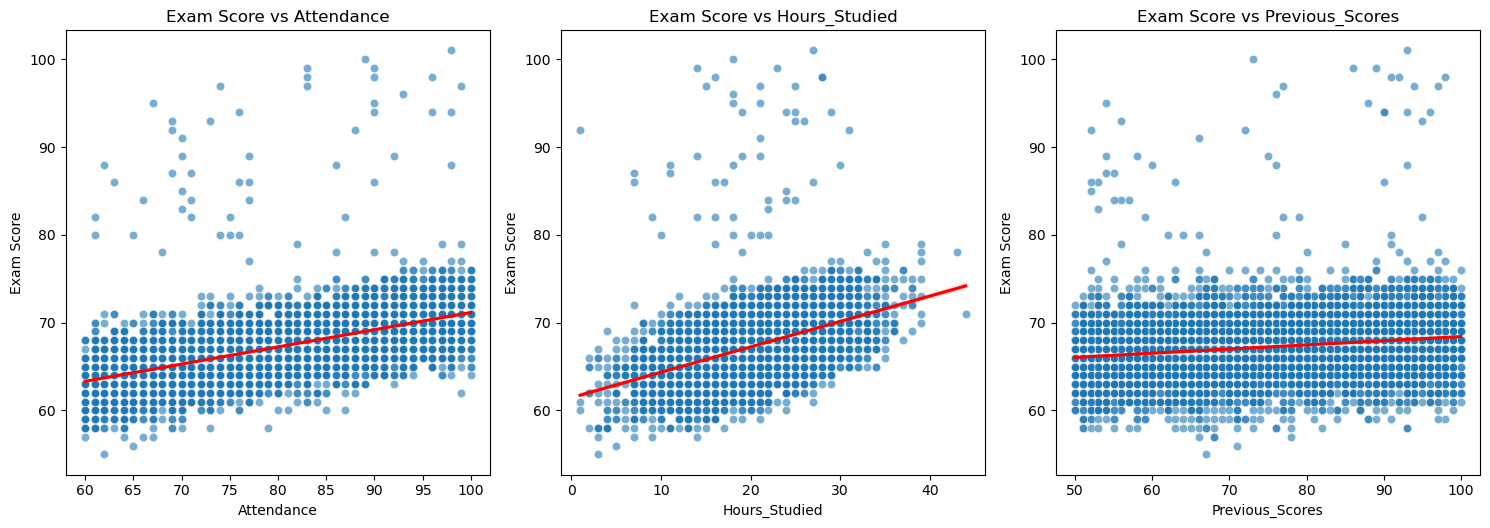

In [51]:
file_path = r'C:\Users\\ASUS\Downloads\Students_Data.csv'
data = pd.read_csv(file_path)

features = ['Attendance', 'Hours_Studied', 'Previous_Scores']

plt.figure(figsize=(15, 15))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  
    sns.scatterplot(x=data[feature], y=data['Exam_Score'], alpha=0.6)
    
    sns.regplot(x=data[feature], y=data['Exam_Score'], scatter=False, color='red')
    
    plt.title(f'Exam Score vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Exam Score')

plt.tight_layout()
plt.show()